<a href="https://www.kaggle.com/code/m0hamedyousry/loan-approval-eda-ml-ann?scriptVersionId=226727803" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder , MinMaxScaler
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import Activation
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2


In [2]:
data = pd.read_csv("/kaggle/input/loan-approval-classification-data/loan_data.csv")

In [3]:
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
data['person_age'] = data['person_age'].astype('int')



In [6]:
data.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.describe().round(2)

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00
mean,27.76,80319.05,5.41,9583.16,11.01,0.14,5.87,632.61,0.22
std,6.05,80422.50,6.06,6314.89,2.98,0.09,3.88,50.44,0.42
min,20.00,8000.00,0.00,500.00,5.42,0.00,2.00,390.00,0.00
25%,24.00,47204.00,1.00,5000.00,8.59,0.07,3.00,601.00,0.00
50%,26.00,67048.00,4.00,8000.00,11.01,0.12,4.00,640.00,0.00
75%,30.00,95789.25,8.00,12237.25,12.99,0.19,8.00,670.00,0.00
max,144.00,7200766.00,125.00,35000.00,20.00,0.66,30.00,850.00,1.00


In [9]:
def detect_outliers(data):
    for feature in data.select_dtypes(include=['number']):
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1                             
        lower_bond = Q1 - 1.5 * IQR
        upper_bond = Q3 + 1.5 * IQR
        print(feature, "Yes" if data[(data[feature] < lower_bond) | (data[feature] > upper_bond)].any().any() else "No")


In [10]:
detect_outliers(data)

person_age Yes
person_income Yes
person_emp_exp Yes
loan_amnt Yes
loan_int_rate Yes
loan_percent_income Yes
cb_person_cred_hist_length Yes
credit_score Yes
loan_status Yes


In [11]:
for feature in ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                    'cb_person_cred_hist_length', 'credit_score']:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1                             
        lower_bond = Q1 - 1.5 * IQR
        upper_bond = Q3 + 1.5 * IQR
        data[feature] = data[feature].clip(lower_bond, upper_bond)

In [12]:
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948.0,0.0,RENT,23093.125,PERSONAL,16.02,0.37,3.0,561.0,No,1
1,21,female,High School,12282.0,0.0,OWN,1000.000,EDUCATION,11.14,0.08,2.0,504.0,Yes,0
2,25,female,High School,12438.0,3.0,MORTGAGE,5500.000,MEDICAL,12.87,0.37,3.0,635.0,No,1
3,23,female,Bachelor,79753.0,0.0,RENT,23093.125,MEDICAL,15.23,0.37,2.0,675.0,No,1
4,24,male,Master,66135.0,1.0,RENT,23093.125,MEDICAL,14.27,0.37,4.0,586.0,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,male,Associate,47971.0,6.0,RENT,15000.000,MEDICAL,15.66,0.31,3.0,645.0,No,1
44996,37,female,Associate,65800.0,17.0,RENT,9000.000,HOMEIMPROVEMENT,14.07,0.14,11.0,621.0,No,1
44997,33,male,Associate,56942.0,7.0,RENT,2771.000,DEBTCONSOLIDATION,10.02,0.05,10.0,668.0,No,1
44998,29,male,Bachelor,33164.0,4.0,RENT,12000.000,EDUCATION,13.23,0.36,6.0,604.0,No,1


In [13]:
data.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [14]:
data.describe().round(2)

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00
mean,27.44,75677.40,5.17,9411.04,11.01,0.14,5.78,632.81,0.22
std,4.93,38071.78,5.14,5832.95,2.98,0.08,3.58,49.80,0.42
min,20.00,8000.00,0.00,500.00,5.42,0.00,2.00,497.50,0.00
25%,24.00,47204.00,1.00,5000.00,8.59,0.07,3.00,601.00,0.00
50%,26.00,67048.00,4.00,8000.00,11.01,0.12,4.00,640.00,0.00
75%,30.00,95789.25,8.00,12237.25,12.99,0.19,8.00,670.00,0.00
max,39.00,168667.12,18.50,23093.12,19.59,0.37,15.50,773.50,1.00


# 1️⃣ What factors influence loan approval?


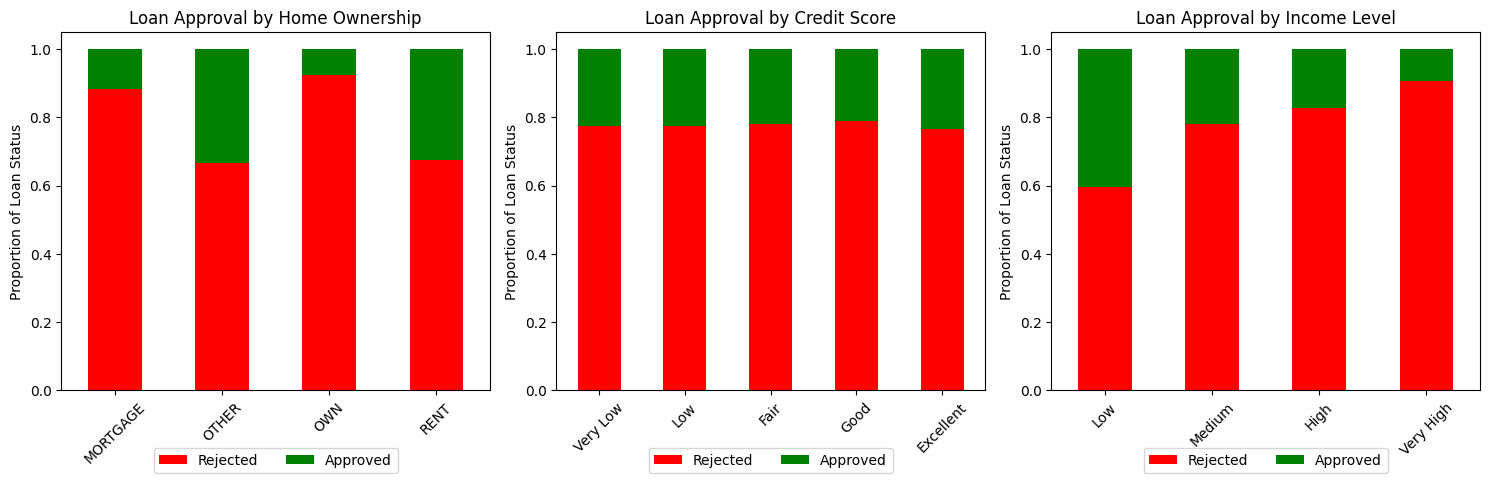

In [15]:
# Convert numerical features into categories
data['credit_score_category'] = pd.cut(data['credit_score'], bins=[300, 600, 650, 700, 750, 800], labels=["Very Low", "Low", "Fair", "Good", "Excellent"])
data['income_category'] = pd.qcut(data['person_income'], q=4, labels=["Low", "Medium", "High", "Very High"])

# Crosstabs for each factor
home_ownership = pd.crosstab(data['loan_status'], data['person_home_ownership'], normalize='columns')
credit_score = pd.crosstab(data['loan_status'], data['credit_score_category'], normalize='columns')
income = pd.crosstab(data['loan_status'], data['income_category'], normalize='columns')

# Plot stacked bar charts
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

colors = ["red", "green"]  # Red for rejected, green for approved

home_ownership.T.plot(kind='bar', stacked=True, ax=axes[0], color=colors)
credit_score.T.plot(kind='bar', stacked=True, ax=axes[1], color=colors)
income.T.plot(kind='bar', stacked=True, ax=axes[2], color=colors)

# Titles & Labels
axes[0].set_title("Loan Approval by Home Ownership")
axes[1].set_title("Loan Approval by Credit Score")
axes[2].set_title("Loan Approval by Income Level")

for ax in axes:
    ax.set_xlabel("")
    ax.set_ylabel("Proportion of Loan Status")
    ax.legend(["Rejected", "Approved"], loc ='lower center', ncol=2, bbox_to_anchor=(0.5, -0.25))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# 2️⃣ What is the relationship between credit score and interest rate?


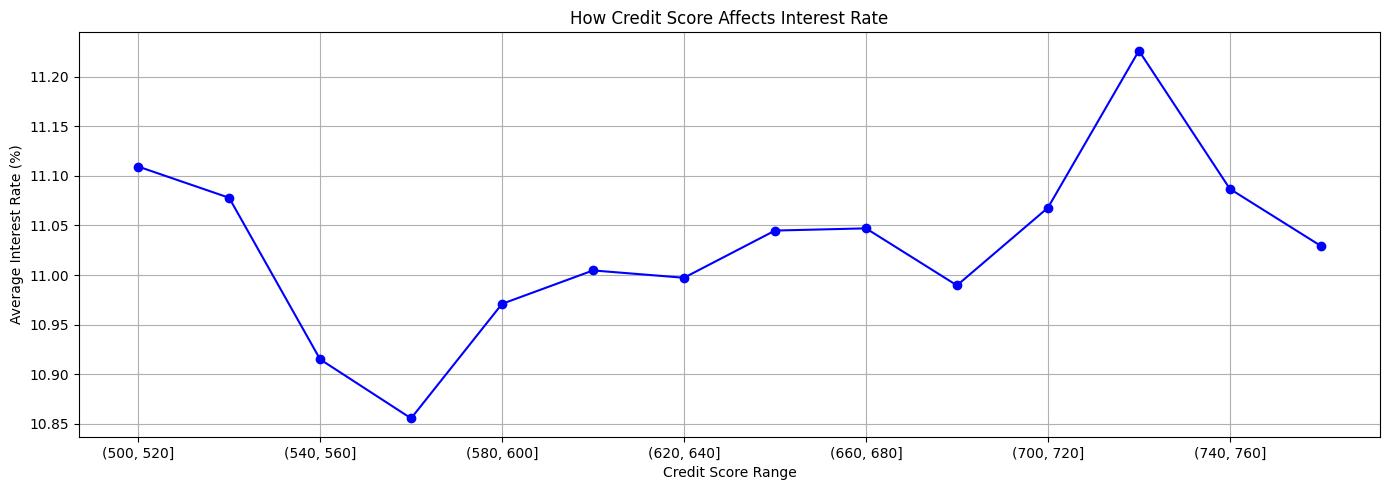

In [16]:
data_sorted = data.sort_values(by='credit_score')

fig, axes = plt.subplots(1, 1, figsize=(14, 5))

data_sorted['credit_score_group'] = pd.cut(data_sorted['credit_score'], bins=np.arange(500, 801, 20))
avg_interest = data_sorted.groupby('credit_score_group')['loan_int_rate'].mean()

avg_interest.plot(kind='line', marker='o', ax=axes, color='blue')
axes.set_title("How Credit Score Affects Interest Rate")
axes.set_xlabel("Credit Score Range")
axes.set_ylabel("Average Interest Rate (%)")
axes.grid(True)

plt.tight_layout()
plt.show()

# 3️⃣ How does employment experience impact loan approval?

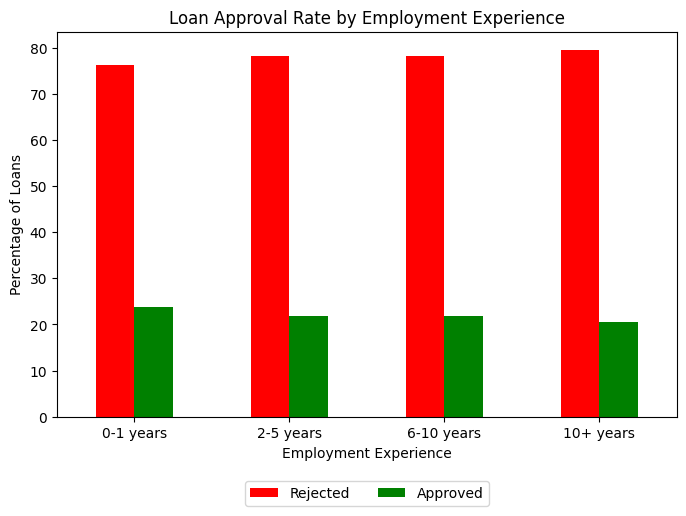

In [17]:
# Binning employment experience into categories
bins = [-1, 1, 5, 10, 20]
labels = ["0-1 years", "2-5 years", "6-10 years", "10+ years"]
data["emp_exp_category"] = pd.cut(data["person_emp_exp"], bins=bins, labels=labels)

# Count of approved and rejected loans for each employment category
loan_status_counts = pd.crosstab(data["emp_exp_category"], data["loan_status"])
loan_status_counts = loan_status_counts.div(loan_status_counts.sum(axis=1), axis=0) * 100  # Convert to percentages

# Plot
loan_status_counts.plot(kind="bar", stacked=False, color=["red", "green"], figsize=(8, 5))
plt.title("Loan Approval Rate by Employment Experience")
plt.xlabel("Employment Experience")
plt.ylabel("Percentage of Loans")
plt.legend(["Rejected", "Approved"],loc ='lower center', ncol=2, bbox_to_anchor=(0.5, -0.25))
plt.xticks(rotation=0)
plt.show()

# 4️⃣ How does loan amount affect loan approval?

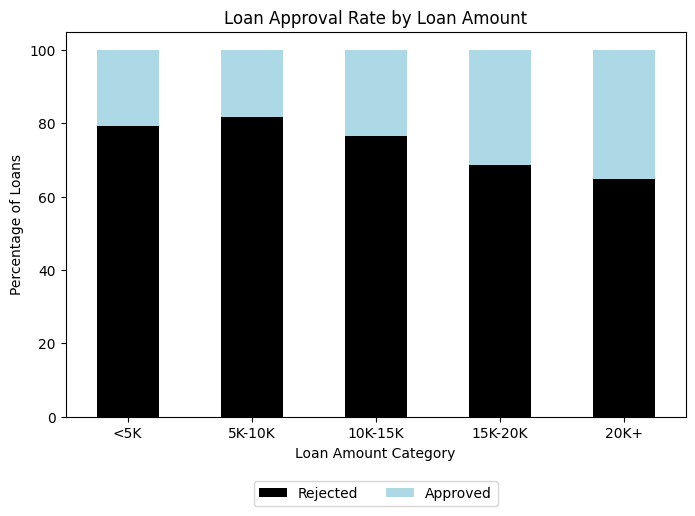

In [18]:
# Binning loan amounts into categories
bins = [0, 5000, 10000, 15000, 20000, 25000]
labels = ["<5K", "5K-10K", "10K-15K", "15K-20K", "20K+"]
data["loan_amount_category"] = pd.cut(data["loan_amnt"], bins=bins, labels=labels)

# Count of approved and rejected loans for each loan amount category
loan_status_counts = pd.crosstab(data["loan_amount_category"], data["loan_status"])
loan_status_counts = loan_status_counts.div(loan_status_counts.sum(axis=1), axis=0) * 100  # Convert to percentages

# Plot
loan_status_counts.plot(kind="bar", stacked=True, color=["Black", "LightBlue"], figsize=(8, 5))
plt.title("Loan Approval Rate by Loan Amount")
plt.xlabel("Loan Amount Category")
plt.ylabel("Percentage of Loans")
plt.legend(["Rejected", "Approved"], loc ='lower center', ncol=2, bbox_to_anchor=(0.5, -0.25))
plt.xticks(rotation=0)
plt.show()

# 5️⃣ How does debt-to-income ratio (loan percent income) impact loan approval?

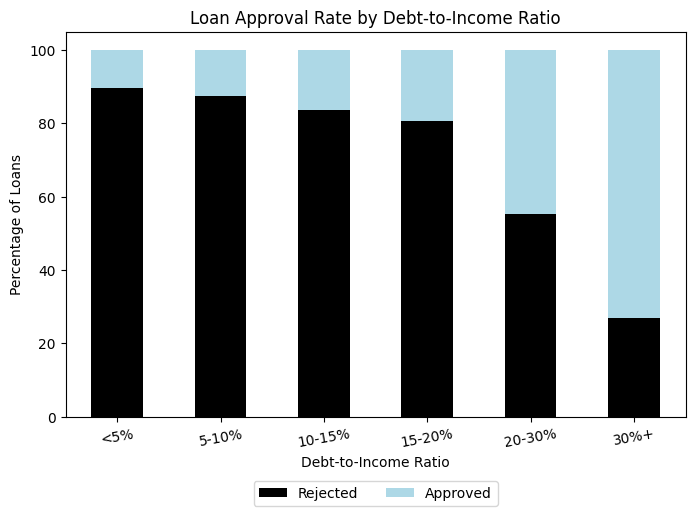

In [19]:
# Binning loan percent income into categories
bins = [0, 0.05, 0.1, 0.15, 0.2, 0.3, 1]
labels = ["<5%", "5-10%", "10-15%", "15-20%", "20-30%", "30%+"]
data["debt_income_category"] = pd.cut(data["loan_percent_income"], bins=bins, labels=labels)

# Count of approved and rejected loans for each category
loan_status_counts = pd.crosstab(data["debt_income_category"], data["loan_status"])
loan_status_counts = loan_status_counts.div(loan_status_counts.sum(axis=1), axis=0) * 100  # Convert to percentages

# Plot
loan_status_counts.plot(kind="bar", stacked=True, color=["Black", "LightBlue"], figsize=(8, 5))
plt.title("Loan Approval Rate by Debt-to-Income Ratio")
plt.xlabel("Debt-to-Income Ratio")
plt.ylabel("Percentage of Loans")
plt.legend(["Rejected", "Approved"], loc ='lower center', ncol=2, bbox_to_anchor=(0.5, -0.25))
plt.xticks(rotation=10)
plt.show()

# ML models 

In [20]:
data = pd.read_csv("/kaggle/input/loan-approval-classification-data/loan_data.csv")

for feature in ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                    'cb_person_cred_hist_length', 'credit_score']:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1                             
        lower_bond = Q1 - 1.5 * IQR
        upper_bond = Q3 + 1.5 * IQR
        data[feature] = data[feature].clip(lower_bond, upper_bond)


In [21]:
categorical_col = data.select_dtypes(include=['object'])
le = LabelEncoder()
for col in categorical_col:
    data[col]=le.fit_transform(data[col])


In [22]:
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0.0,3,23093.125,4,16.02,0.37,3.0,561.0,0,1
1,21.0,0,3,12282.0,0.0,2,1000.000,1,11.14,0.08,2.0,504.0,1,0
2,25.0,0,3,12438.0,3.0,0,5500.000,3,12.87,0.37,3.0,635.0,0,1
3,23.0,0,1,79753.0,0.0,3,23093.125,3,15.23,0.37,2.0,675.0,0,1
4,24.0,1,4,66135.0,1.0,3,23093.125,3,14.27,0.37,4.0,586.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,6.0,3,15000.000,3,15.66,0.31,3.0,645.0,0,1
44996,37.0,0,0,65800.0,17.0,3,9000.000,2,14.07,0.14,11.0,621.0,0,1
44997,33.0,1,0,56942.0,7.0,3,2771.000,0,10.02,0.05,10.0,668.0,0,1
44998,29.0,1,1,33164.0,4.0,3,12000.000,1,13.23,0.36,6.0,604.0,0,1


In [23]:
x = data.drop('loan_status',axis=1)
y = data['loan_status']

In [24]:
scaler = StandardScaler()
x[x.select_dtypes(include=["number"]).columns] = scaler.fit_transform(x[x.select_dtypes(include=["number"]).columns])

In [25]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42 , stratify=y)


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      7000
           1       0.77      0.77      0.77      2000

    accuracy                           0.90      9000
   macro avg       0.85      0.85      0.85      9000
weighted avg       0.90      0.90      0.90      9000



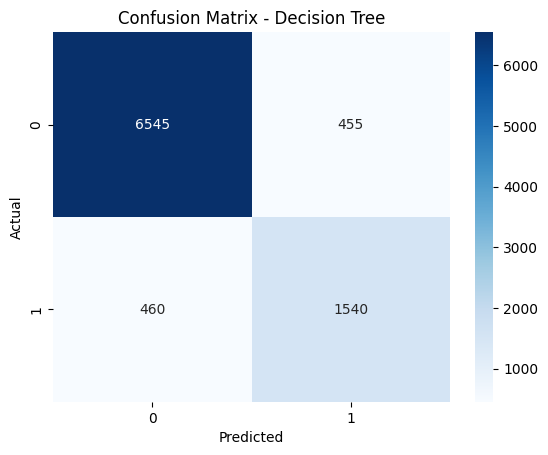


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7000
           1       0.90      0.77      0.83      2000

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



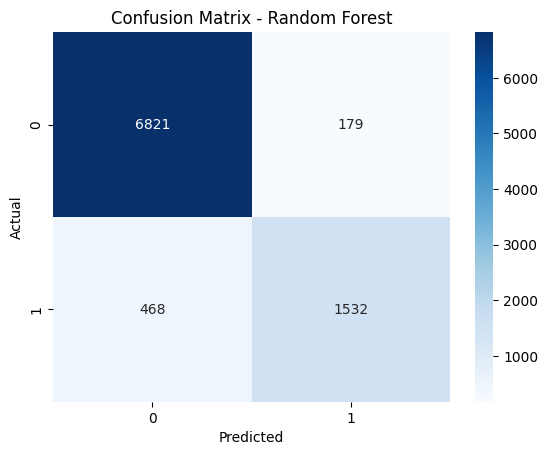


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7000
           1       0.82      0.75      0.78      2000

    accuracy                           0.91      9000
   macro avg       0.88      0.85      0.86      9000
weighted avg       0.91      0.91      0.91      9000



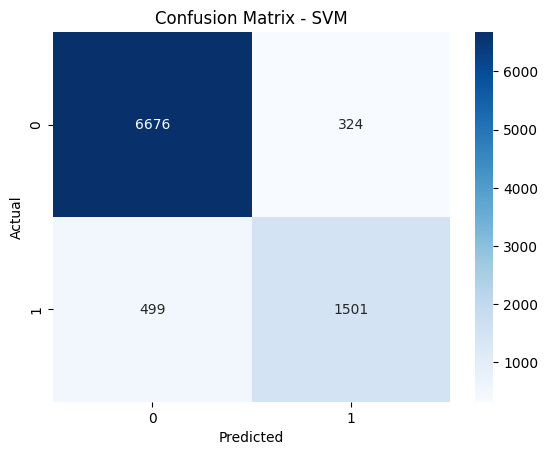


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7000
           1       0.89      0.82      0.85      2000

    accuracy                           0.94      9000
   macro avg       0.92      0.89      0.91      9000
weighted avg       0.94      0.94      0.94      9000



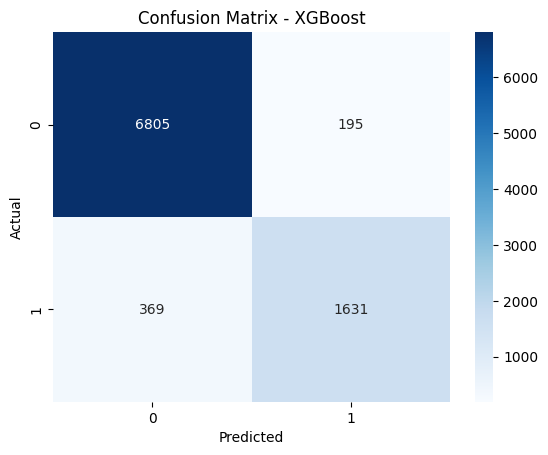


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      7000
           1       0.78      0.75      0.77      2000

    accuracy                           0.90      9000
   macro avg       0.85      0.85      0.85      9000
weighted avg       0.90      0.90      0.90      9000



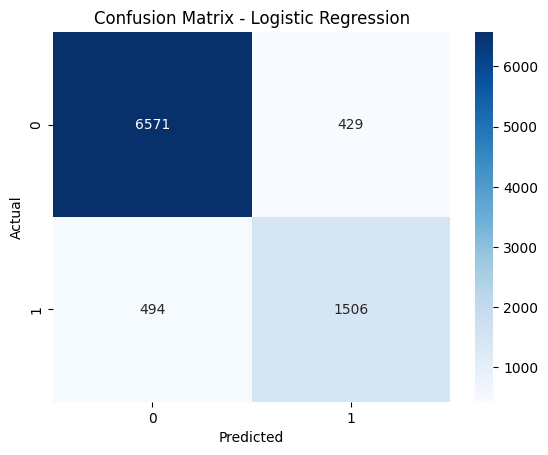

In [26]:
# Function to train and evaluate models
def train_and_evaluate(model, model_name):
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(ytest, y_pred))
    cm = confusion_matrix(ytest, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

# Train and evaluate each model
for name, model in models.items():
    train_and_evaluate(model, name)


# ANN model


In [27]:
model = Sequential([
    Dense(64, input_dim=13),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),
    Dense(32),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.summary()




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,905 (15.25 KB)

 Trainable params: 3,713 (14.50 KB)

 Non-trainable params: 192 (768.00 B)

In [28]:
history=model.fit(xtrain,ytrain,epochs=100,validation_data=(xtest,ytest))

Epoch 1/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8174 - loss: 0.3710 - val_accuracy: 0.8992 - val_loss: 0.2237
Epoch 2/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8822 - loss: 0.2490 - val_accuracy: 0.9052 - val_loss: 0.2177
Epoch 3/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8929 - loss: 0.2307 - val_accuracy: 0.9057 - val_loss: 0.2130
Epoch 4/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8952 - loss: 0.2294 - val_accuracy: 0.9080 - val_loss: 0.2079
Epoch 5/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8971 - loss: 0.2238 - val_accuracy: 0.9077 - val_loss: 0.2067
Epoch 6/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8988 - loss: 0.2235 - val_accuracy: 0.9102 - val_loss: 0.2046
Epoch 7/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8996 - loss: 0.2175 - val_accuracy: 0.9099 - val_loss: 0.2045
Epoch 8/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9012 - loss: 0

In [29]:
model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.001), input_shape=(xtrain.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), 
                    epochs=100, batch_size=32, callbacks=[early_stopping, reduce_lr])

Epoch 1/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8499 - loss: 0.4217 - val_accuracy: 0.9051 - val_loss: 0.2607 - learning_rate: 0.0010
Epoch 2/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8986 - loss: 0.2632 - val_accuracy: 0.9038 - val_loss: 0.2379 - learning_rate: 0.0010
Epoch 3/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8993 - loss: 0.2443 - val_accuracy: 0.9076 - val_loss: 0.2260 - learning_rate: 0.0010
Epoch 4/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9020 - loss: 0.2311 - val_accuracy: 0.9042 - val_loss: 0.2269 - learning_rate: 0.0010
Epoch 5/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9012 - loss: 0.2324 - val_accuracy: 0.9078 - val_loss: 0.2222 - learning_rate: 0.0010
Epoch 6/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9041 - loss: 0.2303 - val_accuracy: 0.9086 - val_loss: 0.2193 - learning_rate: 0.0010
Epoch 7/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9